In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('USA_Housing.csv')

In [ ]:
df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [6]:
df.drop('Address',axis=1,inplace=True)

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [8]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [9]:
import seaborn as sns

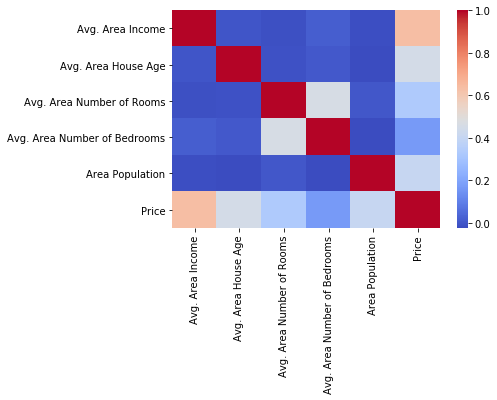

In [10]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [11]:
df.drop('Avg. Area Number of Bedrooms',axis=1,inplace=True)

In [12]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


In [13]:
X=df.drop('Price',axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss=StandardScaler()

In [16]:
scaled_array=ss.fit_transform(X)

In [17]:
scaled_array.shape

(5000, 4)

In [18]:
X=pd.DataFrame(data=scaled_array,columns=X.columns)

In [19]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.028660,-0.296927,0.021274,-1.317599
1,1.000808,0.025902,-0.255506,0.403999
2,-0.684629,-0.112303,1.516243,0.072410
3,-0.491499,1.221572,-1.393077,-0.186734
4,-0.807073,-0.944834,0.846742,-0.988387


In [44]:
Y=df['Price']

In [45]:
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)  # 70% data for training and 30% for testing

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model=LinearRegression()

In [50]:
model.fit(X_train,Y_train)  #.fit for training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
model.coef_  # m1,m2 ,m3,m4...formula--> y=mx+c...y=m1x1+m2x2+....m4x4

array([229431.86319416, 166030.18920156, 121807.99590075, 150281.69890538])

In [52]:
model.intercept_  #C

1230966.5194795127

In [53]:
ypred=model.predict(X_test)

In [54]:
ypred.shape

(1500,)

In [60]:
Y_test-ypred  #(-) mean more predicted..(+)mean less predicted

513     279830.255188
823     133308.740917
2771    101587.084485
563     -97071.052040
616     -21675.208578
2471   -211798.560367
1097    -70052.922148
1928   -197465.863609
2207     52329.350309
4886     66906.907587
469    -120367.847023
90     -180922.381707
3477    -36274.894859
4249   -153074.758042
2620    -16809.073875
1713     85777.064623
2888    -30424.212850
3314     -9296.349226
3184   -200024.088016
559    -107964.239785
491      20296.628147
2752   -149210.405773
3223     37002.942823
328     135197.412370
1410     63629.291020
3841    200134.902871
2618    226915.038253
1368      -686.098689
2634    -71348.551231
4722    201912.091319
            ...      
2900     55112.923490
2763    106398.065336
4581    -78049.449569
3753   -102815.482324
1593   -221456.702265
2830    -91292.034519
891     -11087.517376
3488     79549.451687
620     103992.173199
4309     32454.613025
1022    132041.162857
1218    -63490.732907
524    -133905.598548
874    -147889.362065
3392    11

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


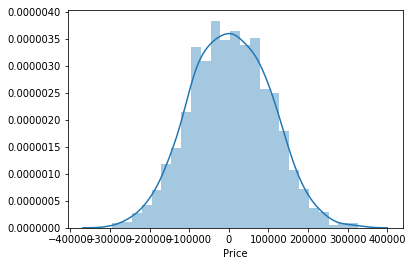

In [56]:
sns.distplot(Y_test-ypred) # predicted values should be near to 0

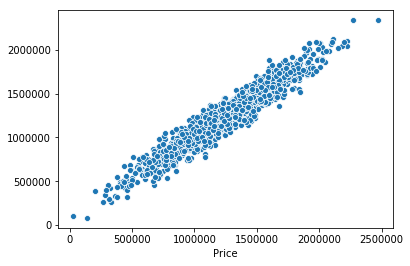

In [57]:
sns.scatterplot(Y_test,ypred)

In [58]:
from sklearn.metrics import mean_absolute_error #sign of (-) will bcm + and all values get added to calculate mean

In [59]:
mean_absolute_error(Y_test,ypred) #price is predicted around +-81408

81408.67963695728